In [1]:
%reload_ext autoreload
%autoreload 2
#Tells the kernel to automatically check for changes in imported files

In [2]:
import os
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

print(f"Project Root: {project_root}")
print(f"Python Path: {sys.path[0]}")
print(os.getcwd())
from src import data_loader, feature_engineering, vix_extract_web_scrapper, refine_vix_futures, Labelled_data_creation

Project Root: /Users/pustak/Desktop/ml_risk_overlay
Python Path: /Users/pustak/Desktop/ml_risk_overlay
/Users/pustak/Desktop/ml_risk_overlay/Notebooks


Validation check for SPX 21 day Realized Volatility attribute to check if it has been successfully engineered from spot SPX index:

In [3]:
spx_df_raw = data_loader.load_raw_data('spx_daily_raw.csv')

spx_df = spx_df_raw.copy()
spx_df.set_index('date', inplace=True)
spx_df.index = pd.to_datetime(spx_df.index)
spx_df['simple_return'] = spx_df['close'].pct_change()
spx_df['log_return'] = np.log(spx_df['close'] / spx_df['close'].shift(1))
spx_df['SPX_Realized_Vol_21d'] = feature_engineering.calculate_realized_volatility(close_prices=spx_df['close'], window=21)
spx_df

,close,open,high,low,simple_return,log_return,SPX_Realized_Vol_21d
date,,,,,,,
1996-01-02,620.73,615.93,620.74,613.17,NaN,NaN,NaN
1996-01-03,621.32,620.73,623.25,619.56,0.000950,0.000950,NaN
1996-01-04,617.70,621.32,624.49,613.96,-0.005826,-0.005843,NaN
1996-01-05,616.71,617.70,617.70,612.02,-0.001603,-0.001604,NaN
1996-01-08,618.46,616.71,618.46,616.49,0.002838,0.002834,NaN
...,...,...,...,...,...,...,...
2023-08-25,4405.71,4389.38,4418.46,4356.29,0.006718,0.006696,0.119449
2023-08-28,4433.31,4426.03,4439.56,4414.98,0.006265,0.006245,0.115791
2023-08-29,4497.63,4432.75,4500.14,4431.68,0.014508,0.014404,0.128091


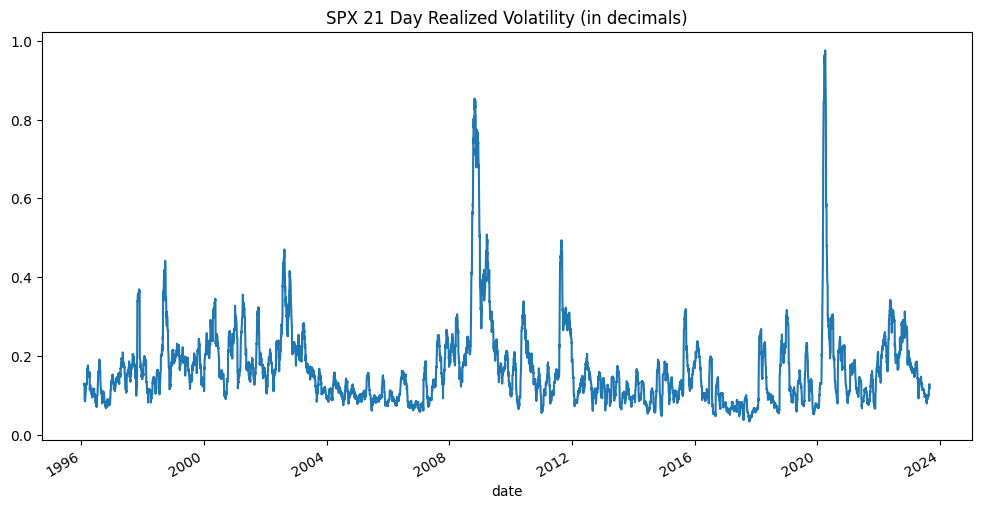

In [4]:
spx_df['SPX_Realized_Vol_21d'].plot(title='SPX 21 Day Realized Volatility (in decimals)', figsize=(12,6))
plt.show()

In [5]:
#Addition of Expiration Date Column to Raw VIX Futures Data
raw_data_folder = "../data/raw/vix_futures_data"
refined_data_folder = "../data/refined_vix_futures"
refine_vix_futures.refine_vix_raw_data(raw_data_folder, refined_data_folder)


Starting refining process for 240 files...
  Refined and saved VX_2019-11-20.csv
  Refined and saved VX_2018-10-17.csv
  Refined and saved VX_2025-07-16.csv
  Refined and saved VX_2020-05-20.csv
  Refined and saved VX_2014-04-16.csv
  Refined and saved CFE_K08_VX.csv
  Refined and saved VX_2022-11-16.csv
  Refined and saved CFE_J08_VX.csv
  Refined and saved CFE_M12_VX.csv
  Refined and saved VX_2015-05-20.csv
  Refined and saved CFE_Z13_VX.csv
  Refined and saved CFE_U06_VX.csv
  Refined and saved VX_2024-01-17.csv
  Refined and saved VX_2018-07-18.csv
  Refined and saved CFE_X10_VX.csv
  Refined and saved VX_2022-04-20.csv
  Refined and saved VX_2023-05-17.csv
  Refined and saved VX_2022-03-15.csv
  Refined and saved VX_2018-02-14.csv
  Refined and saved CFE_V09_VX.csv
  Refined and saved CFE_N11_VX.csv
  Refined and saved VX_2025-02-19.csv
  Refined and saved CFE_Q13_VX.csv
  Refined and saved VX_2019-04-17.csv
  Refined and saved VX_2017-11-15.csv
  Refined and saved CFE_F12_VX.cs

In [6]:
refined_data_folder = "../data/refined_vix_futures"
spot_vix_file = "../data/raw/vix_daily_raw.csv"
final_output_path = "../data/vix_term_structure_final.csv"

final_dataframe = refine_vix_futures.create_final_dataframe(
    refined_futures_folder=refined_data_folder,
    spot_vix_filepath=spot_vix_file
)

if not final_dataframe.empty:
    # --- NEW: Filter the DataFrame to start from 2006 ---
    start_date = '2006-01-01'
    final_dataframe = final_dataframe[final_dataframe.index >= start_date]
    print(f"\nDataFrame filtered to start from the first available trading day of {start_date[:4]}.")
    # --- END NEW ---

    print("\n--- Final Analysis-Ready DataFrame ---")
    print(f"Date range: {final_dataframe.index.min().date()} to {final_dataframe.index.max().date()}")
    print(f"Total trading days: {len(final_dataframe)}")
    
    print("\nSample of the first 5 rows (starting from 2006):")
    print(final_dataframe.head())
    
    print("\nSample of the last 5 rows:")
    print(final_dataframe.tail())
    
    final_dataframe.to_csv(final_output_path)
    print(f"\nFinal DataFrame successfully saved to '{final_output_path}'")

Found 240 refined CSV files to process...
Futures term structure successfully built.
Spot VIX data loaded.
Normalizing historical data: Dividing M1/M2 prices by 10 for dates before 2007-03-26...
Data Cleaning: Removed 7 rows with non-positive M1/M2 settlement prices.
Final DataFrame created with all features.

DataFrame filtered to start from the first available trading day of 2006.

--- Final Analysis-Ready DataFrame ---
Date range: 2006-01-03 to 2023-08-31
Total trading days: 4441

Sample of the first 5 rows (starting from 2006):
            M1_Price  M2_Price M1_Expiration M2_Expiration  M1_DTE  M2_DTE  \
Date                                                                         
2006-01-03     12.02     13.88    2006-01-18    2006-02-15      15      43   
2006-01-04     11.84     13.84    2006-01-18    2006-02-15      14      42   
2006-01-05     11.83     13.73    2006-01-18    2006-02-15      13      41   
2006-01-06     11.56     13.53    2006-01-18    2006-02-15      12      

In [7]:
term_structure_file = "../data/vix_term_structure_final.csv"
raw_data_folder = "../data/raw"

processed_folder = Path("../data/processed")
processed_folder.mkdir(parents=True, exist_ok=True)
final_labeled_output_path = processed_folder / "final_labeled_dataset.csv"
feature_dataset_output_path = processed_folder/"final_feature_dataset.csv"

# Step 1: Build the feature dataset
feature_dataset = Labelled_data_creation.build_final_dataset(
    term_structure_path=term_structure_file,
    raw_data_folder=raw_data_folder
)

if not feature_dataset.empty:
    # Step 2: Add the target label
    
    labeled_dataset = Labelled_data_creation.add_target_label(feature_dataset)
    
    print("\n--- Final Labeled DataFrame ---")
    print(f"Date range: {labeled_dataset.index.min().date()} to {labeled_dataset.index.max().date()}")
    
    print("\nLabel Distribution:")
    print(labeled_dataset['Panic_Imminent_21d'].value_counts(normalize=True).round(4))
    
    print("\nSample of the final data:")
    print(labeled_dataset.tail())
    feature_dataset.to_csv(feature_dataset_output_path)
    print(f"\n Final feature dataset successfully saved to '{feature_dataset_output_path}'")
    labeled_dataset.to_csv(final_labeled_output_path)
    print(f"\nFinal labeled dataset successfully saved to '{final_labeled_output_path}'")


Loading data from vix_daily_raw.csv ...

Joining all other data sources...
Loading data from vix_change_5d.csv ...
Loading data from spx_realized_vol_21d.csv ...
Loading data from vvix_daily_raw.csv ...
Loading data from credit_spread_high_yield.csv ...
Loading data from credit_spread_high_yield_change_21d.csv ...
Loading data from yield_curve_slope_10y_2y.csv ...
Loading data from vix_term_structure_final.csv ...

Normalizing units for percentage-based columns...
  - Converted 'credit_spread_high_yield' to decimal format.
  - Converted 'yield_curve_slope_10y_2y' to decimal format.
Cleanup: Removed 2653 rows with missing data after joining.

Final dataset successfully assembled.

Creating target label 'Panic_Imminent_21d'...

--- Final Labeled DataFrame ---
Date range: 2006-03-06 to 2023-08-31

Label Distribution:
Panic_Imminent_21d
1    0.606
0    0.394
Name: proportion, dtype: float64

Sample of the final data:
            vix_level  vix_change_5d  spx_realized_vol_21d  vvix_level  \

In [15]:

from src.train1 import run_and_log_evaluation
run_and_log_evaluation()

All outputs will be saved in: '../model_outputs/logistic_regression/run_1'

Full textual output successfully saved to: ../model_outputs/logistic_regression/run_1/full_evaluation_log.txt


In [16]:
from pathlib import Path
current = Path.cwd()
print(current.resolve())
parent_dir = current.parent
target_file = parent_dir / "model_outputs/logistic_regression/run_1/full_evaluation_log.txt"
with open(target_file, "r") as f:
    content = f.read()
print(content)        


/Users/pustak/Desktop/ml_risk_overlay/Notebooks
For the sake of assurance, I want to confirm that this is the first logistic regression evaluation script.

Setting up a rolling window with 9 folds on 3393 development samples...

----- Fold 1/9 -----
Date Ranges:
  Training on: 2006-03-06 to 2010-06-09
  Testing on:  2010-07-12 to 2011-07-12

  Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.77      1.00      0.87       195

    accuracy                           0.77       252
   macro avg       0.39      0.50      0.44       252
weighted avg       0.60      0.77      0.68       252

  Matthews Corr. Coef. (MCC): 0.000

----- Fold 2/9 -----
Date Ranges:
  Training on: 2007-06-01 to 2011-06-10
  Testing on:  2011-07-13 to 2012-07-13

  Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1      

## Problem

The overall performance of this report is incredibly weak with the average MCC just being above 0.176. The initial step is to refine some of the existing features.

